# Prediction of Stock Price Direction 
This data project has been used as a take-home assignment in the recruitment process for the data science positions at NeuroTrade.

## Assignment 

Define, train and evaluate a predictive model that takes as the input the data provided. Do not use external data for this project. You may use any algorithm of your choice or compare multiple models.

Make sure that the solution reflects your entire thought process - it is more important how the code is structured rather than the final metrics. You may assume that any model resulting in AUC > 0.515 will be enough. You are expected to spend no more than 3 hours working on this project.

## Data Exploration
To start, we’ll load the datasets and examine the available attributes to get a sense of the data. Then, we’ll create visualizations to identify any trends and explore the potential for feature engineering. We’ll be using pandas for data loading and analysis, so let’s begin by importing the library and diving into the exploration phase.

In [21]:
import pandas as pd

# Load the training set 
df_train = pd.read_csv("datasets/AMZN_train.csv")

In [22]:
# Count the number of rows and columns in the training set
df_train.shape

(4781, 7)

In [23]:
# The `info()` method in Pandas is a great tool for quickly reviewing the column names, data types, non-null counts, and the memory usage of a dataset. In this case, the dataset contains mostly numerical columns (5 float values and 1 integer), along with an object column for the date. There are no missing values, and the dataset is only 261 KB in size.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4781 non-null   object 
 1   Open       4781 non-null   float64
 2   High       4781 non-null   float64
 3   Low        4781 non-null   float64
 4   Close      4781 non-null   float64
 5   Adj Close  4781 non-null   float64
 6   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.6+ KB


In [24]:
# Use the describe() method to get a quick overview of our data set.
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4.781000e+03
mean,127.619845,129.480122,125.697925,127.662449,127.662449,8.225935e+06
std,145.693083,147.132537,144.053633,145.677581,145.677581,7.810188e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,34.299999,34.849998,33.660000,34.310001,34.310001,4.200900e+06
50%,62.880001,64.750000,60.937500,62.750000,62.750000,6.200100e+06
75%,189.009995,191.600006,186.210007,189.029999,189.029999,9.239900e+06
max,717.380005,722.450012,711.510010,717.929993,717.929993,1.043292e+08


In [25]:
# Call 'Date' seperately as describe() only works on numerical columns
df_train['Date'].describe()

count           4781
unique          4781
top       1997-05-15
freq               1
Name: Date, dtype: object

In [26]:
# Print the time range of the training set
df_train['Date'].min(), df_train['Date'].max()

('1997-05-15', '2016-05-13')

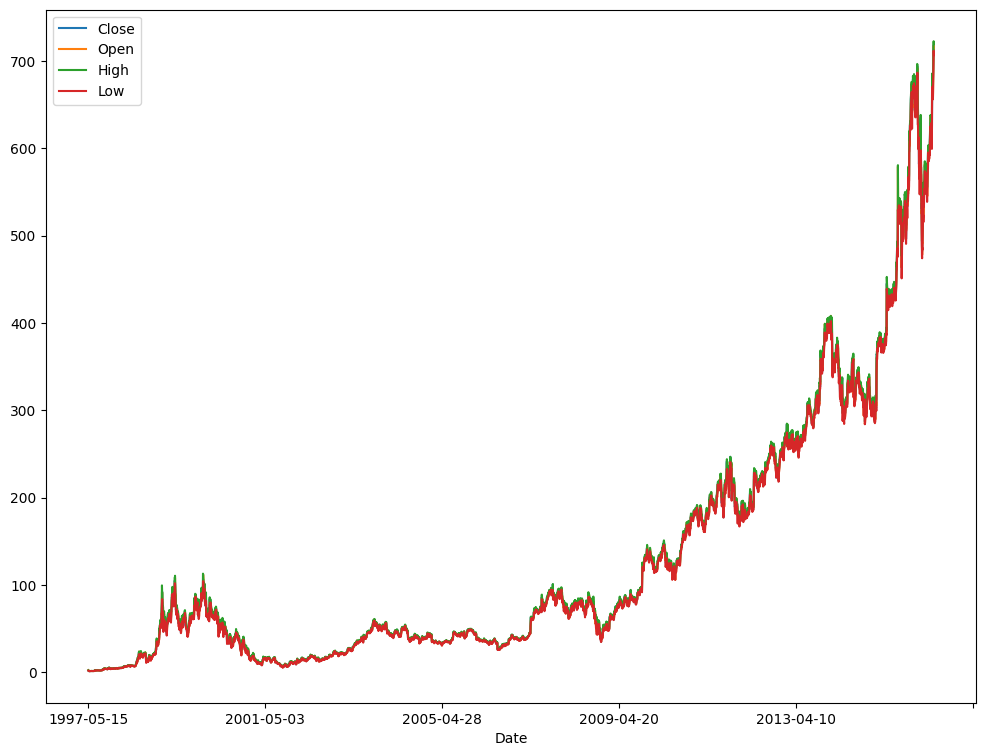

In [27]:
# Plot stock price over time
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,9)
_ = df_train.plot(x="Date", y=["Close", "Open", "High", "Low"])

Shape (503, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Open       503 non-null    float64
 2   High       503 non-null    float64
 3   Low        503 non-null    float64
 4   Close      503 non-null    float64
 5   Adj Close  503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB

               Open         High          Low        Close    Adj Close  \
count   503.000000   503.000000   503.000000   503.000000   503.000000   
mean    992.201292   999.898131   982.574513   991.828966   991.828966   
std     255.496588   259.220381   250.100614   254.885469   254.885469   
min     689.559998   696.820007   682.119995   691.359985   6

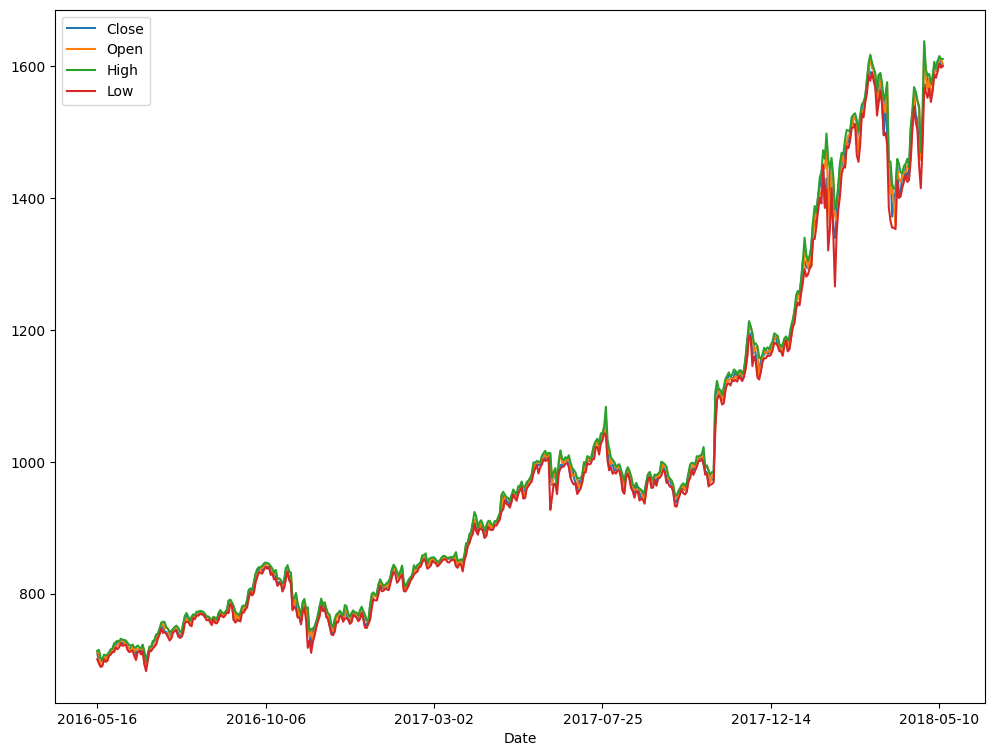

In [28]:
# Create a function to repeat the same process for the validation and test set to make sure that they have the same distribution as the training set.
def analyse(dataframe):
    """Runs an exploration analysis of the dataframe."""
    print("Shape", dataframe.shape, "\n")
    print("Columns", dataframe.columns, "\n")
    dataframe.info()
    print("\n", dataframe.describe(), "\n")
    print("The data ranges from", dataframe["Date"].min(), "to", dataframe["Date"].max())
    dataframe.plot(x="Date", y=["Close", "Open", "High", "Low"])

# Read validation and test sets then analyze them 
df_val = pd.read_csv("datasets/AMZN_val.csv")
analyse(df_val)  

Shape (503, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Open       503 non-null    float64
 2   High       503 non-null    float64
 3   Low        503 non-null    float64
 4   Close      503 non-null    float64
 5   Adj Close  503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB

               Open         High          Low        Close    Adj Close  \
count   503.000000   503.000000   503.000000   503.000000   503.000000   
mean    992.201292   999.898131   982.574513   991.828966   991.828966   
std     255.496588   259.220381   250.100614   254.885469   254.885469   
min     689.559998   696.820007   682.119995   691.359985   6

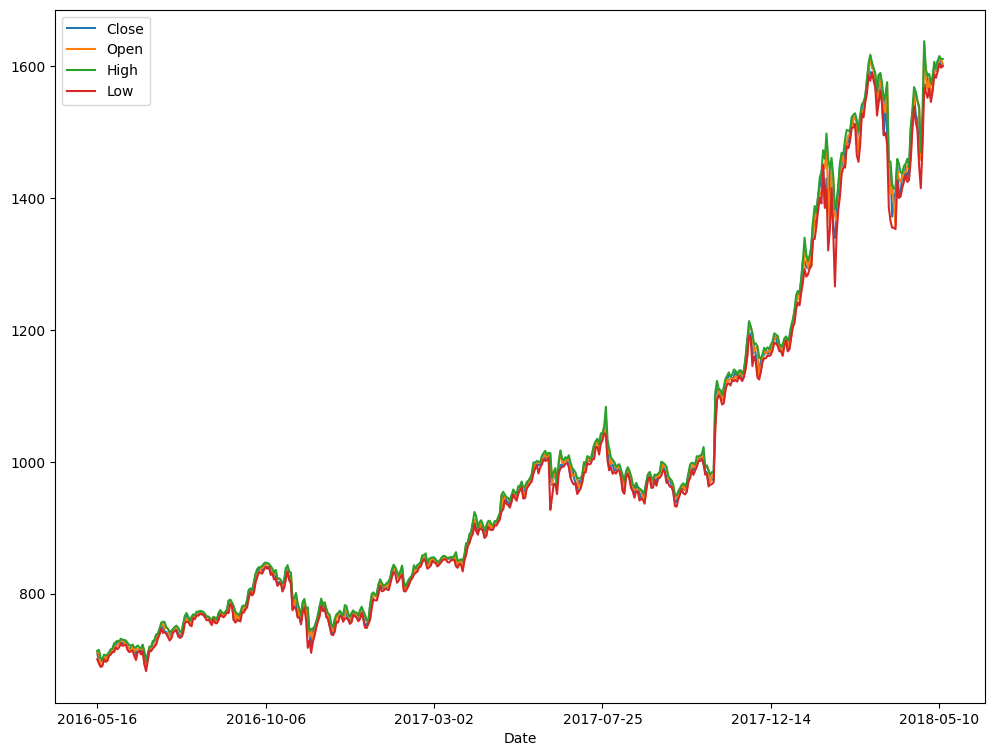

In [29]:
df_test = pd.read_csv("datasets/AMZN_test.csv")
analyse(df_val)

After completing our exploration of the data, we can proceed to the predictive modeling phase of the task. The goal is to predict whether the next day's closing price will be higher than the opening price. Since this information isn't directly available in the dataset, we need to infer it.

This is straightforward; we simply need to compare the closing and opening prices for the following day.

In [30]:
# Sort the data by date in ascending order
df_train.sort_values(by="Date", inplace=True)
df_val.sort_values(by="Date", inplace=True)
df_test.sort_values(by="Date", inplace=True)

In the next step, we shift the data by one row (or one day) and perform a comparison of the prices. To achieve this, we utilize pandas' `shift()` method, which efficiently handles this task. By specifying a period of -1, we shift the data backwards by one day, allowing us to compare the current day's prices to the following day's. As this is a logical operation, pandas will return a `True` or `False` result for each comparison. Since machine learning models typically require numerical values, we map these results to `1` and `0` instead. Finally, to store the outcomes, we create a new column named `Target`, which will hold these values.

In [31]:
df_train["Target"] = (df_train["Close"] > df_train["Open"]).shift(periods=-1, fill_value=0).astype(int)
df_train

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0
...,...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,1
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,1
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,1
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200,0


In [32]:
# Running the value_counts method on the Target column gives us the distribution
df_train["Target"].value_counts()

Target
1    2392
0    2389
Name: count, dtype: int64

In [33]:
# Repeat the same process for the validation and test sets
df_val["Target"] = (df_val["Close"] > df_val["Open"]).shift(periods=-1, fill_value=0).astype(int)
df_val["Target"].value_counts()

Target
0    255
1    248
Name: count, dtype: int64

In [34]:
df_test["Target"] = (df_val["Close"] > df_val["Open"]).shift(periods=-1, fill_value=0).astype(int)
df_test["Target"].value_counts()

Target
0.0    255
1.0    248
Name: count, dtype: int64

## Feature Engineering
Stock prices are influenced by time, meaning today's price often depends on past trends and market activities. To capture these patterns, we need a way to reflect the price movement over the last few days. 

One straightforward approach is calculating a moving average, which helps smooth out short-term fluctuations and highlights longer-term trends. With Pandas, the `rolling()` method makes it easy to compute these averages by applying calculations over a sliding window of data.

In the next steps, we'll compute moving averages over 3-day and 7-day windows and add these as new features in the dataset. Keep in mind that the data must be sorted by date beforehand—otherwise, the results from `rolling()` won’t make sense.

In [35]:
# Compute moving averages over 30 days 
df_train["Moving_Average_30"] = (df_train["Close"] - df_train["Open"]).rolling(window=30, min_periods=1).mean()
df_val["Moving_Average_30"] = (df_val["Close"] - df_val["Open"]).rolling(window=30, min_periods=1).mean()
df_test["Moving_Average_30"] = (df_test["Close"] - df_test["Open"]).rolling(window=30, min_periods=1).mean()

In [36]:
# Compute moving averages over 7 days
df_train["Moving_Average_7"] = (df_train["Close"] - df_train["Open"]).rolling(window=7, min_periods=1).mean()
df_val["Moving_Average_7"] = (df_val["Close"] - df_val["Open"]).rolling(window=7, min_periods=1).mean()
df_test["Moving_Average_7"] = (df_test["Close"] - df_test["Open"]).rolling(window=7, min_periods=1).mean()


In [37]:
# Other features that can be added to the dataset include:
# Current price direction
df_train["Today_Direction"] = df_train["Close"] - df_train["Open"]
df_val["Today_Direction"] = df_val["Close"] - df_val["Open"]
df_test["Today_Direction"] = df_test["Close"] - df_test["Open"]

# Price range
df_train["Price_Range"] = df_train["High"] - df_train["Low"]
df_val["Price_Range"] = df_val["High"] - df_val["Low"]
df_test["Price_Range"] = df_test["High"] - df_test["Low"]

In [38]:
# Display few random rows of the training set
df_train.sample(10, random_state=42)

,Date,Open,High,Low,Close,Adj Close,Volume,Target,Moving_Average_30,Moving_Average_7,Today_Direction,Price_Range
2895,2008-11-14,43.610001,44.500000,41.500000,41.750000,41.750000,11949700,0,-0.036666,-0.601429,-1.860001,3.000000
4430,2014-12-22,301.940002,307.359985,301.940002,306.540009,306.540009,4003800,0,-0.053997,-0.705710,4.600007,5.419983
3618,2011-09-29,234.169998,234.300003,216.289993,222.440002,222.440002,9378500,0,0.970998,-2.434283,-11.729996,18.010010
763,2000-05-24,46.437500,49.750000,40.437500,48.562500,48.562500,11666600,0,-0.190104,-0.580357,2.125000,9.312500
4392,2014-10-28,289.760010,298.000000,289.760010,295.589996,295.589996,5572600,0,0.513335,2.681423,5.829986,8.239990
4657,2015-11-16,640.919983,649.989990,622.289978,647.809998,647.809998,7435900,0,0.843996,-0.264299,6.890015,27.700012
4008,2013-04-22,259.350006,264.600006,258.029999,263.549988,263.549988,2119100,1,0.047335,-0.287140,4.199982,6.570007
555,1999-07-29,51.187500,52.187500,50.000000,50.781250,50.781250,18748000,0,-0.129948,-0.713170,-0.406250,2.187500
2754,2008-04-28,80.639999,82.500000,80.120003,81.970001,81.970001,10991900,0,0.541667,1.212857,1.330002,2.379997
33,1997-07-02,1.515625,1.593750,1.510417,1.588542,1.588542,3882000,1,-0.012674,0.004464,0.072917,0.083333


## Select a Baseline Model:
In the following cells we implement:

1. Logistic regression
2. Decision tree
3. Random forest
4. Gradient boosting ensemble

After training the models on the training data, we will assess their performance on the validation set by calculating the `AUC` metric.

In [39]:
# We set up x and y variables for the training, validation, and test sets
# this is the target column that we aim to predict
y_col = "Target"
# these are the input features for the models
X_cols = [
    "Open",
    "Close",
    "High",
    "Low",
    "Volume",
    "Adj Close",
    "Today_Direction",
    "Price_Range",
    "Moving_Average_3",
    "Moving_Average_7"
]



In [40]:
# Apply the X_cols and y_col to the training, validation, and test sets
X_train = df_train[X_cols]
y_train = df_train[y_col]

X_val = df_val[X_cols]
y_val = df_val[y_col]

X_test = df_test[X_cols]
y_test = df_test[y_col]

KeyError: "['Moving_Average_3'] not in index"

## Logistic Regression 

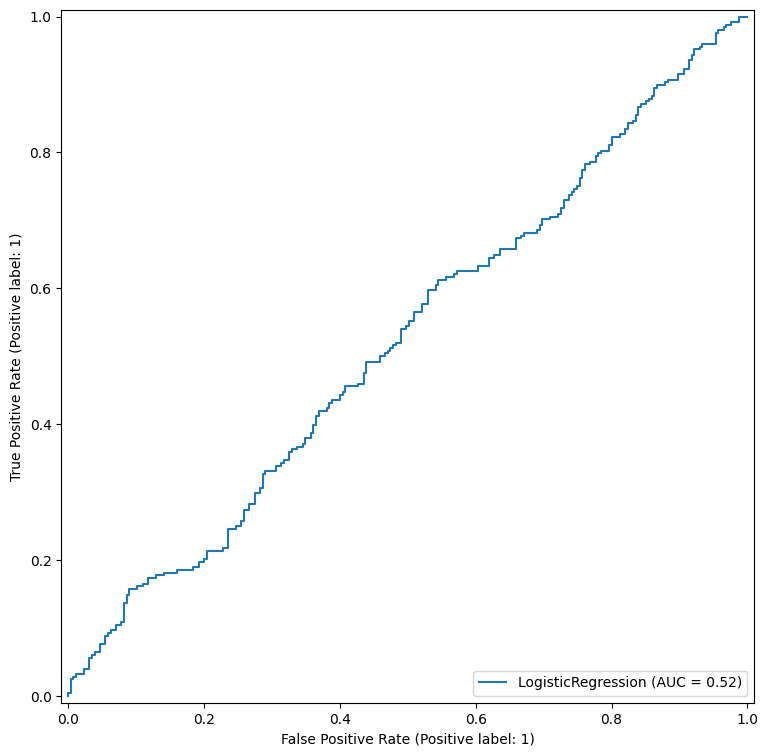

In [64]:
# Start with enablin the RandomSeed for reproducibility
RANDOM_SEED = 42 

# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay

# Use default parameters for the Logistic Regression model
lr = LogisticRegression()

# Train the Logistic Regression model on the training set
lr.fit(X_train, y_train)

# Evaluate the model on the validation set using the ROC curve
RocCurveDisplay.from_estimator(lr, X_val, y_val)


# Decision Tree 


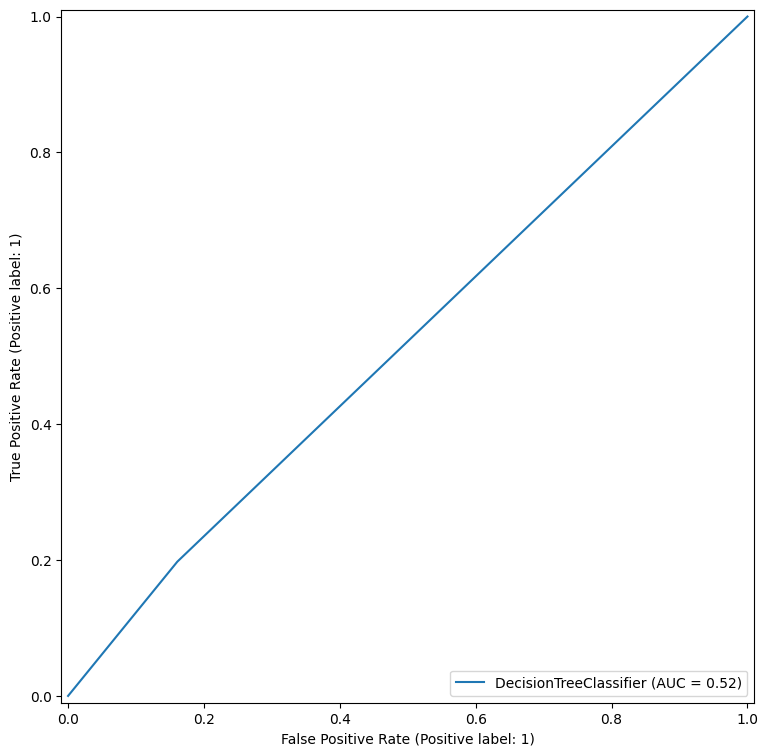

In [65]:
from sklearn.tree import DecisionTreeClassifier
# Use random seed for reproducibility
dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt.fit(X_train, y_train) # Train the Logistic Regression model on the training set

RocCurveDisplay.from_estimator(dt, X_val, y_val) # Evaluate the model on the validation set using the ROC curve

## Random Forest

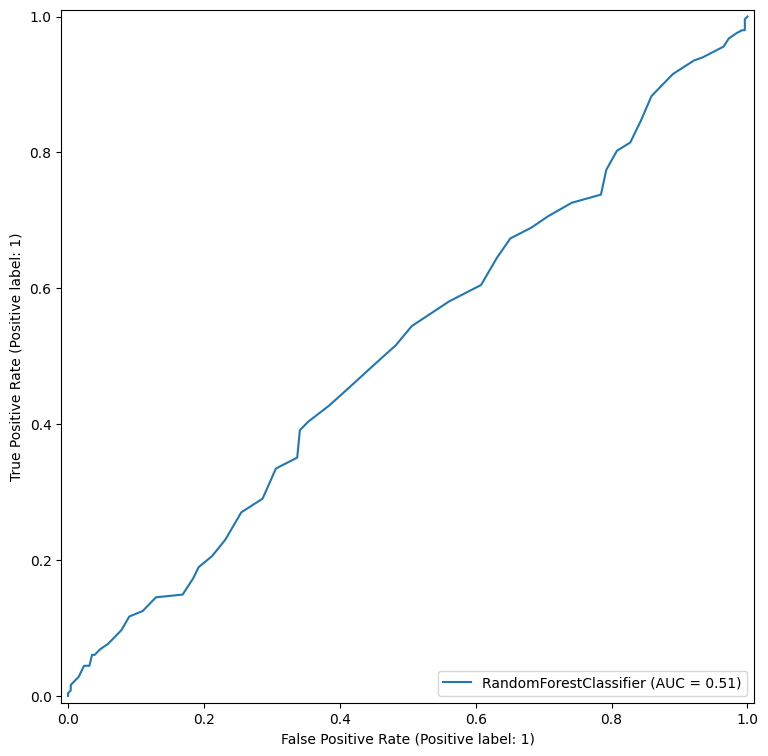

In [66]:
from sklearn.ensemble import RandomForestClassifier
# Use random seed for reproducibility
rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf.fit(X_train, y_train) # Train the Logistic Regression model on the training set

# Plot the ROC curve and show the AUC score for the validation set
RocCurveDisplay.from_estimator(rf, X_val, y_val)

## Gradient Boosting 


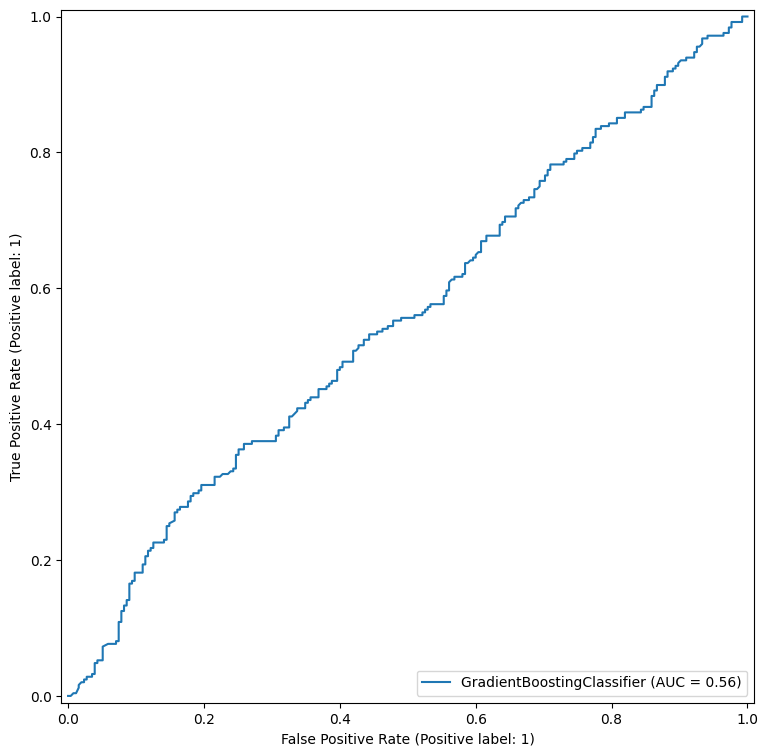

In [67]:
from sklearn.ensemble import GradientBoostingClassifier 
gb = GradientBoostingClassifier(random_state=RANDOM_SEED)
gb.fit(X_train, y_train)

RocCurveDisplay.from_estimator(gb, X_val, y_val) # Evaluate the model on the validation set using the ROC curve

Compared to the other models, the Gradient Boosting model achieved the highest AUC score of 0.56, indicating it performs the best for this dataset. Next, we will tune hyperparameters on validation set with the goal of outperforming the baseline established here.



## Model Tuning (Adjusting Parameters)

### Logistic Regression:

In [68]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Step 1: Define the Logistic Regression model
lr = LogisticRegression(random_state=RANDOM_SEED)

# Step 2: Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Step 3: Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)

# Step 4: Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Step 5: Extract the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Step 7: Evaluate the best model on the validation set
y_pred_proba = best_model.predict_proba(X_val)[:, 1]
auc_score = roc_auc_score(y_val, y_pred_proba)
print("Validation AUC Score:", auc_score)



Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/DELL/Desktop/Projects/Prediciton of Stock Price/myworkspace/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/DELL/Desktop/Projects/Prediciton of Stock Price/myworkspace/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/DELL/Desktop/Projects/Prediciton of Stock Price/myworkspace/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/DELL/Desktop/Projects/Prediciton of Stock Price/myworkspace/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/DELL/Desktop/Projects/Prediciton of Stock Price/myworkspace/lib/pytho

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Validation AUC Score: 0.4695445920303606


/Users/DELL/Desktop/Projects/Prediciton of Stock Price/myworkspace/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Decision Tree

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Step 1: Define the parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Step 2: Perform Randomized Search with Cross-Validation
dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt_random_search = RandomizedSearchCV(estimator=dt, param_distributions=dt_param_grid, 
                                      n_iter=10, scoring='roc_auc', cv=5, 
                                      verbose=1, random_state=RANDOM_SEED, n_jobs=-1)
dt_random_search.fit(X_train, y_train)


# Step 3: Best Parameters and AUC for Decision Tree
dt_best_params = dt_random_search.best_params_
dt_best_model = dt_random_search.best_estimator_
dt_auc = roc_auc_score(y_val, dt_best_model.predict_proba(X_val)[:, 1])
print("Best Decision Tree Parameters:", dt_best_params)
print(f"Decision Tree AUC: {dt_auc:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Decision Tree Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}
Decision Tree AUC: 0.5317


/Users/DELL/Desktop/Projects/Prediciton of Stock Price/myworkspace/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/DELL/Desktop/Projects/Prediciton of Stock Price/myworkspace/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/DELL/Desktop/Projects/Prediciton of Stock Price/myworkspace/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/DELL/Desktop

### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Step 1: Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Step 2: Perform Randomized Search with Cross-Validation
rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid, 
                                      n_iter=10, scoring='roc_auc', cv=5, 
                                      verbose=1, random_state=RANDOM_SEED, n_jobs=-1)
rf_random_search.fit(X_train, y_train)


# Step3: Best Parameters and AUC for Random Forest
rf_best_params = rf_random_search.best_params_
rf_best_model = rf_random_search.best_estimator_
rf_auc = roc_auc_score(y_val, rf_best_model.predict_proba(X_val)[:, 1])
print("Best Random Forest Parameters:", rf_best_params)
print(f"Random Forest AUC: {rf_auc:.4f}")

### Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Define the parameter grid for Gradient Boostingz
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'criterion': ['friedman_mse', 'mse']
}

# Step 2: Perform Randomized Search with Cross-Validation
gb = GradientBoostingClassifier(random_state=RANDOM_SEED)
gb_random_search = RandomizedSearchCV(estimator=gb, param_distributions=gb_param_grid, 
                                      n_iter=10, scoring='roc_auc', cv=5, 
                                      verbose=1, random_state=RANDOM_SEED, n_jobs=-1)
gb_random_search.fit(X_train, y_train)

# Step 3: Best Parameters and AUC for Gradient Boosting
gb_best_params = gb_random_search.best_params_
gb_best_model = gb_random_search.best_estimator_
gb_auc = roc_auc_score(y_val, gb_best_model.predict_proba(X_val)[:, 1])
print("Best Gradient Boosting Parameters:", gb_best_params)
print(f"Gradient Boosting AUC: {gb_auc:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/DELL/Desktop/Projects/Prediciton of Stock Price/myworkspace/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/DELL/Desktop/Projects/Prediciton of Stock Price/myworkspace/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/DELL/Desktop/Projects/Prediciton of Stock Price/myworkspace/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/DELL/Desktop

Best Gradient Boosting Parameters: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.2, 'criterion': 'friedman_mse'}
Gradient Boosting AUC: 0.5236


## Hyperparameter Fine-Tuning

Because Gradient Boosting and Decision Tree are the most worth considering; therefore, we will conduct further tuning hyperparameter to select the best model for test set.

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Step 1: Define a new parameter grid for Gradient Boostingz
gb_param_grid = {
    'n_estimators': [100, 200, 500],  # Increase to 500 for more complex models
    'learning_rate': [0.001, 0.01, 0.05, 0.1],  # Decrease learning rate for better generalization
    'max_depth': [3, 5, 7, 10],  # Try higher depth values to capture more complexity
    'min_samples_split': [2, 5, 10],  # Fine-tune the number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Regularize by ensuring leaf nodes are not too small
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Subsample values between 0.7 and 1.0 for regularization
    'criterion': ['friedman_mse', 'mse'],  # Test both criteria to identify the best one
    'ccp_alpha': [0.0, 0.01, 0.1, 0.2],  # Adding alpha for quantile regression if your target variable has outliers
}

# Step 2: Perform Randomized Search with Cross-Validation
gb = GradientBoostingClassifier(random_state=RANDOM_SEED)
gb_random_search = RandomizedSearchCV(estimator=gb, param_distributions=gb_param_grid, 
                                      n_iter=10, scoring='roc_auc', cv=5, 
                                      verbose=1, random_state=RANDOM_SEED, n_jobs=-1)
gb_random_search.fit(X_train, y_train)

# Step 3: Best Parameters and AUC for Gradient Boosting
gb_best_params = gb_random_search.best_params_
gb_best_model = gb_random_search.best_estimator_
gb_auc = roc_auc_score(y_val, gb_best_model.predict_proba(X_val)[:, 1])
print("Best Gradient Boosting Parameters:", gb_best_params)
print(f"Gradient Boosting AUC: {gb_auc:.4f}") 


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Step 1: Define the parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 5, 10, 20, 50, 100],  # Add more depth options for deeper trees
    'min_samples_split': [2, 5, 10, 20],  # More aggressive splitting
    'min_samples_leaf': [1, 2, 4, 8],  # Allow deeper leaf nodes with more samples
    'max_features': ['auto', 'sqrt', 'log2', None],  # Test full set of features as well
    'criterion': ['gini', 'entropy'],  # Keep both criteria
    'ccp_alpha': [0.0, 0.01, 0.1, 0.2]  # Add pruning regularization
}


# Step 2: Perform Randomized Search with Cross-Validation
dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt_random_search = RandomizedSearchCV(estimator=dt, param_distributions=dt_param_grid, 
                                      n_iter=10, scoring='roc_auc', cv=5, 
                                      verbose=1, random_state=RANDOM_SEED, n_jobs=-1)
dt_random_search.fit(X_train, y_train)


# Step 3: Best Parameters and AUC for Decision Tree
dt_best_params = dt_random_search.best_params_
dt_best_model = dt_random_search.best_estimator_
dt_auc = roc_auc_score(y_val, dt_best_model.predict_proba(X_val)[:, 1])
print("Best Decision Tree Parameters:", dt_best_params)
print(f"Decision Tree AUC: {dt_auc:.4f}")

## Conclusion
The gradient boosting classifier provided the best AUC score on the validation set. In machine learning, it's typical to train several models using the same training and validation data to find the one that performs the best. To replicate a real-world setting, we've kept the test set aside and haven't used it until now.

In the next step, we’ll evaluate how well the gradient boosting classifier performs on the test set. This is easy to do by simply calling `plot_roc_curve` with the test set instead of the validation set.

Next, we'll assess the performance of the gradient boosting classifier on the test set. It's simple to do by using `plot_roc_curve` with the test set instead of the validation set.

In [ ]:
import numpy as np

# Check if there are any NaNs in X_test or y_test
print(np.any(np.isnan(X_test)))  # Checks if there are any NaNs in X_test
print(np.any(np.isnan(y_test)))  # Checks if there are any NaNs in y_test


False
True


In [36]:
from sklearn.impute import SimpleImputer
# Impute missing values with the mean for X_test
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)

# If y_test has NaNs, you can impute them as well (convert y_test to a numpy array)
y_test_imputed = SimpleImputer(strategy='most_frequent').fit_transform(y_test.values.reshape(-1, 1)).flatten()


Test AUC Score: 0.5268


/Users/DELL/Desktop/Projects/Prediciton of Stock Price/myworkspace/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/Users/DELL/Desktop/Projects/Prediciton of Stock Price/myworkspace/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


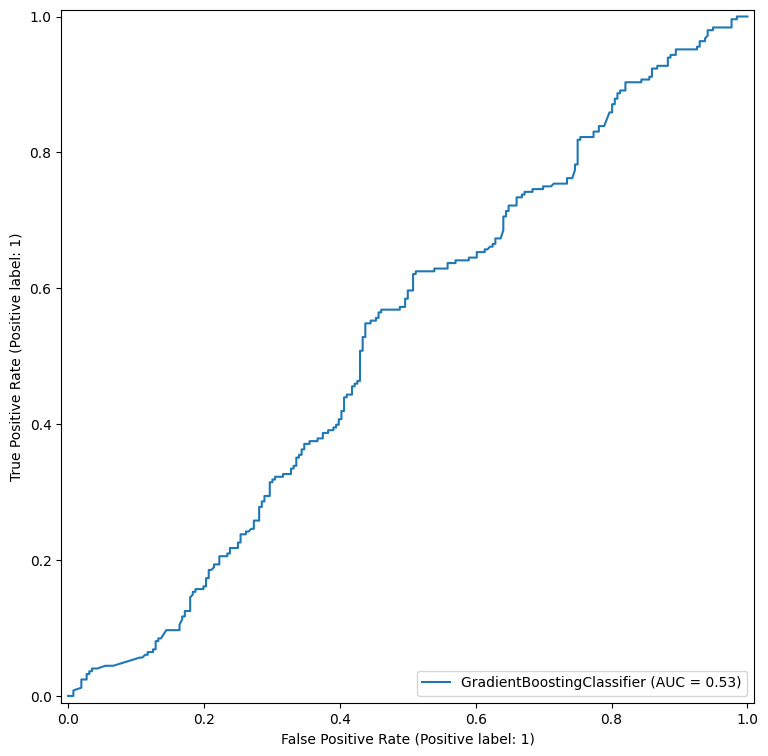

In [43]:
# Plot gradient bosting model in a ROC curve for the test set 
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Step 1: Extract the best model from RandomizedSearchCV
best_model = gb_random_search.best_estimator_  

# Step 2: Make predictions on the test set
y_test_proba = best_model.predict_proba(X_test_imputed)[:, 1]  # Probabilities for the positive class

# Step 3: Calculate the AUC-ROC score
test_auc = roc_auc_score(y_test_imputed, y_test_proba)
print(f"Test AUC Score: {test_auc:.4f}")

# Step 4: Plot the ROC curve
RocCurveDisplay.from_estimator(best_model, X_test_imputed, y_test_imputed)


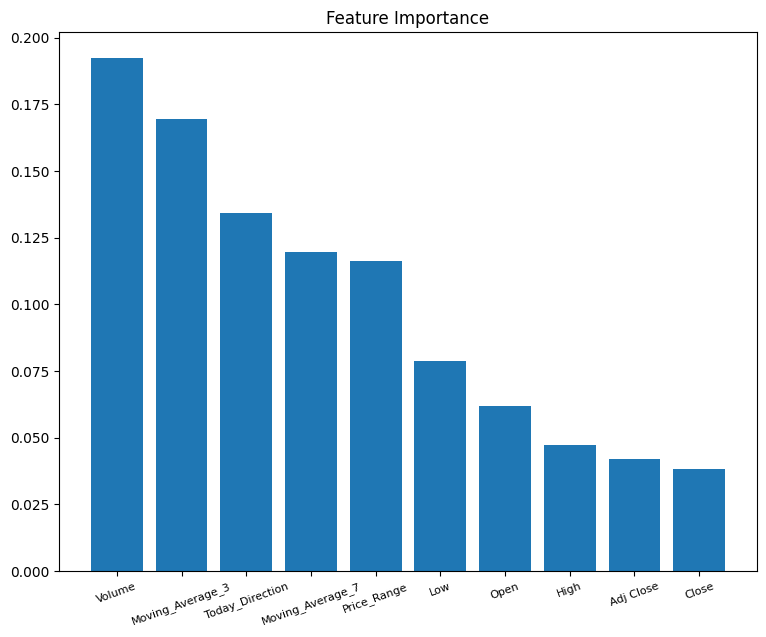

In [28]:
# Calculate feature importance
import numpy as np 
importances = gb.feature_importances_
# Sort feature importances in descending order 
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [df_train[X_cols].columns[i] for i in indices]
_ = plt.figure(figsize=(9,7))
plt.bar(names, importances[indices])
_ = plt.title("Feature Importance")
_ = plt.xticks(rotation=20, fontsize=8)